In [76]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [77]:
import matplotlib.pyplot as plt

# Réseau what

In [78]:
import sys
sys.path.append("../figures")

from what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test

In [79]:
from main import init
args = init(filename='../data/2019-06-05')
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True}

### Unit tests

In [80]:
transform=transforms.Compose([
                               WhatShift(i_offset=-8, j_offset=8),
                               WhatBackground(),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

L'offset doit être explicité, il n'y a pas d'offset aléatoire implémenté

In [81]:
dataset_train = datasets.MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [82]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [83]:
dataset_test = datasets.MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [84]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [85]:
data, label = next(iter(train_loader))

In [86]:
label.shape

torch.Size([100])

Text(0.5, 1.0, 'label : 7')

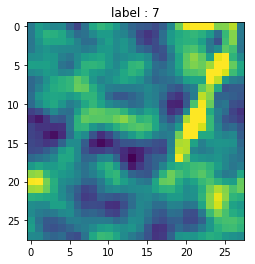

In [87]:
i = 5
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))

### Résultats

Le réseau est entraîné sur des images centrées.
On le teste ensuite pour des images plus ou moins décalées selon les axes x et y.
On obtient l'accuracy map suivante :

Le maximum d'accuracy vaut 0.9507 pour un décalage de (0,0)


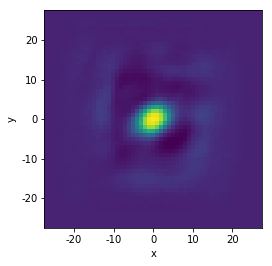

In [88]:
pathAccuracyMapTxt = '../dev/AccuracyMap_MNIST_cnn_0.1_0.1_0.75_0.7_2019-06-06_23h49.txt'

file = np.loadtxt(pathAccuracyMapTxt)
plt.imshow(file)
plt.xlabel("x")
plt.ylabel("y")

plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])
plt.yticks([i for i in range(7,55,10)], [i for i in range(20,-25,-10)])

print("Le maximum d'accuracy vaut", np.amax(file), "pour un décalage de (0,0)")

# Réseau robust what

In [89]:
import sys
sys.path.append("../figures")

from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [90]:
from main import init
args = init(filename='../data/2019-06-12')
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 1.0,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'what_offset_std': 5.0,
 'what_offset_max': 15}

### Unit tests

In [91]:
transform=transforms.Compose([
                               WhatShift(args, i_offset=None, j_offset=None),
                               WhatBackground(),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [92]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [93]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [94]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [95]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [96]:
data, label = next(iter(test_loader))

In [97]:
label.shape

torch.Size([100])

Text(0.5, 1.0, 'label : 4')

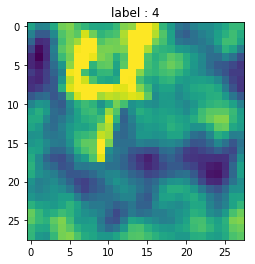

In [98]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))

### Résultats

Le réseau est entraîné sur des images décalées aléatoirement selon les axes x et y.
On le teste ensuite pour des images plus ou moins décalées selon les axes x et y.
On obtient l'accuracy map suivante :

Le maximum d'accuracy vaut 0.9465 pour un décalage de (0,0)


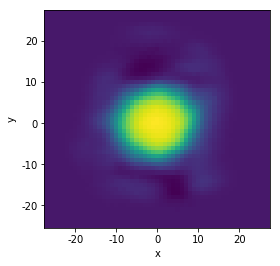

In [66]:
pathAccuracyMapTxt = '../dev/AccuracyMap_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-12_16h11.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=53)
plt.imshow(file)

plt.xlabel("x")
plt.ylabel("y")

plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])
plt.yticks([i for i in range(7,55,10)], [i for i in range(20,-25,-10)])

print("Le maximum d'accuracy vaut", np.amax(file), "pour un décalage de (0,0)")

On a aussi cherché à comparer le taux de réussite réel du réseau (courbe "correct" ci-dessous) à la certitude que le réseau avait de donner la bonne réponse (courbe "posterior_test"). En étudiant les 55 valeurs de décalages pour x = 0 et y variant de -27 à +27, on obtient les courbes suivantes :

([<matplotlib.axis.XTick at 0xbb203c8>,
 <a list of 5 Text xticklabel objects>)

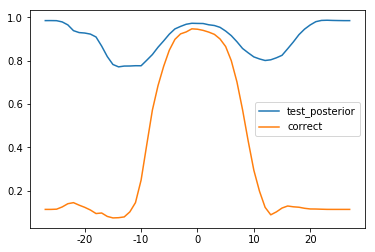

In [30]:
pathAccuracyMapTxt = '../dev/AccuracyLign_MNIST_cnn_robust_what_0.1_0.1_1_0.7_60epoques_2019-06-13_13h07.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=2)
plt.plot(file.T)
plt.legend(['test_posterior', 'correct'])
plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])

Au centre, la courbe bleue est proche de la courbe réelle. Vers les extrémités, les deux courbes sont cependant très éloignées. Cela est probablement du à l'incapacité actuelle de nos réseaux à réussir à apprendre lorsque la valeur what_offset_std devient trop grande, ou lorsqu'on tombe sur une valeur "interdite".

Quand le réseau n'arrive pas à apprendre il classifie toutes les images comme étant des 1.